In [28]:
# Data Load & Preprocessing
import pandas as pd
import numpy as np
import os, sys
import matplotlib.pyplot as plt
import pathlib
import cv2
from tqdm import tqdm

WORKING_PATH = pathlib.Path(os.path.abspath('')).parent.parent
print(WORKING_PATH)
trainset = pd.read_csv(WORKING_PATH / "./dataset/severstal-steel-defect/train.csv")
TRAINSET_IMAGE_PATH = pathlib.Path(WORKING_PATH / "./dataset/severstal-steel-defect/train_images")
print(f"Trainset Shape : {trainset.shape}")

positive_class = 1 # user define
positive_dataset = trainset.loc[trainset['ClassId']==positive_class]
negative_dataset = trainset.loc[trainset['ClassId']!=positive_class]

print(f"Positive Trainset Shape : {positive_dataset.shape}")
print(f"Negative Trainset Shape : {negative_dataset.shape}")

positive_dataset.head()
# preprocessing


/home/hwang-exp/dev/flame-ssd-api-server
Trainset Shape : (7095, 3)
Positive Trainset Shape : (897, 3)
Negative Trainset Shape : (6198, 3)


,ImageId,ClassId,EncodedPixels
0,0002cc93b.jpg,1,29102 12 29346 24 29602 24 29858 24 30114 24 3...
2,000a4bcdd.jpg,1,37607 3 37858 8 38108 14 38359 20 38610 25 388...
8,002fc4e19.jpg,1,146021 3 146275 10 146529 40 146783 46 147038 ...
18,008ef3d74.jpg,1,356336 4 356587 11 356838 18 357089 25 357340 ...
21,00ac8372f.jpg,1,101742 3 101998 12 102253 19 102301 22 102509 ...


/home/hwang-exp/dev/flame-ssd-api-server/dataset/severstal-steel-defect/train_images/0002cc93b.jpg


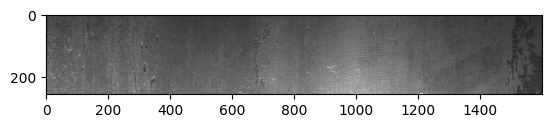

In [30]:
import matplotlib.image as img

print(TRAINSET_IMAGE_PATH / pathlib.Path(positive_dataset.iloc[0].ImageId))
test = img.imread(TRAINSET_IMAGE_PATH / pathlib.Path(positive_dataset.iloc[0].ImageId))
plt.imshow(test)
plt.show()

In [ ]:
import torch.nn as nn
class AE(nn.Module):
    def __init__(self):
        super(AE, self).__init__()
        self.enc = nn.Sequential(
            nn.Linear(784, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU()
        )
        self.dec = nn.Sequential(
            nn.Linear(16, 32),
            nn.ReLU(),
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 784),
            nn.ReLU()
        )
    def forward(self, x):
        encode = self.enc(x)
        decode = self.dec(encode)
        return decode